In [1]:
import numpy as np
import pandas as pd
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
np.random.seed(42)

In [ ]:
# Download data if you haven't already done so 
if not os.path.exists('train'):
    !curl -L "https://universe.roboflow.com/ds/Bop04RKoqG?key=cZyMbQzDcS" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [3]:
# Clone YOLOv5 from official repo
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15679, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 15679 (delta 1), reused 2 (delta 0), pack-reused 15672
Receiving objects: 100% (15679/15679), 14.39 MiB | 25.80 MiB/s, done.
Resolving deltas: 100% (10747/10747), done.


In [ ]:
%cd yolov5/
!pwd

In [ ]:
!pip install -r requirements.txt # req for YOLOv5

In [27]:
def visualize(INFER_PATH, num_images):
    """
    function to visualize inference images
    """
    cnt = 0
    infer_images = glob.glob(f"{INFER_PATH}/*.jpg")
    for pred_image in infer_images:
        
        image = cv2.imread(pred_image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(8, 8))
        plt.imshow(image)
        plt.axis('off')
        plt.show()
        
        cnt += 1
        if cnt == num_images:
            break

In [ ]:
!python detect.py --weights /csgo-detection/last.pt \ # predict using weights from trained model
--source /csgo-detection/test/images --name "inference_results"

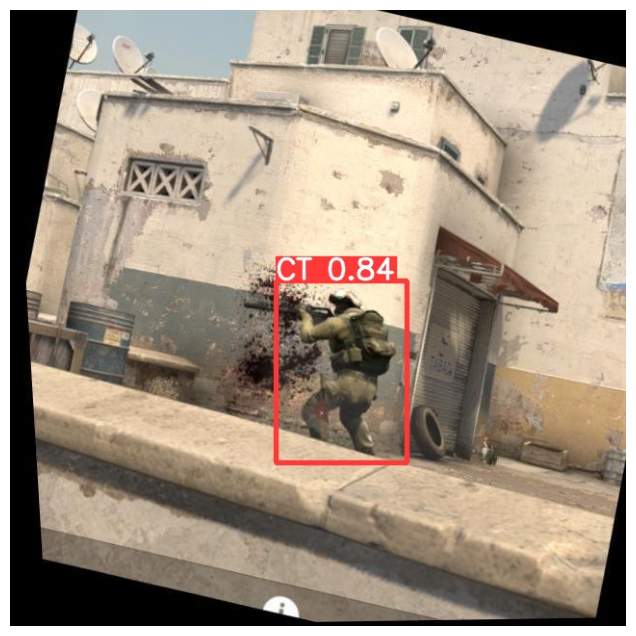

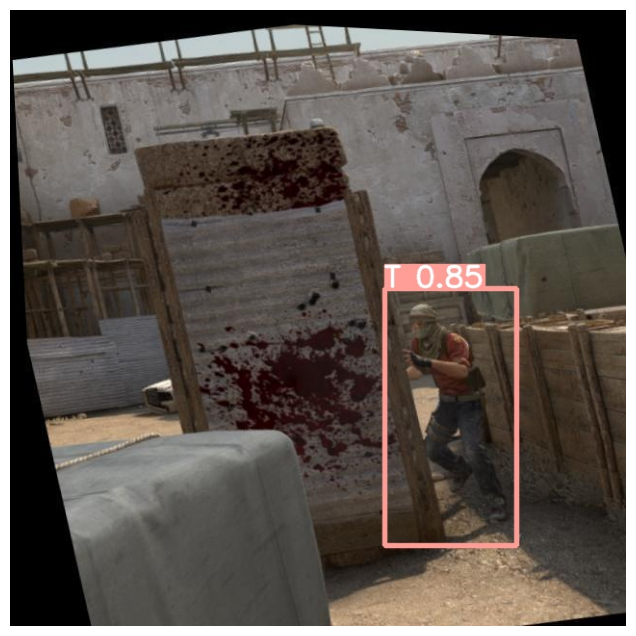

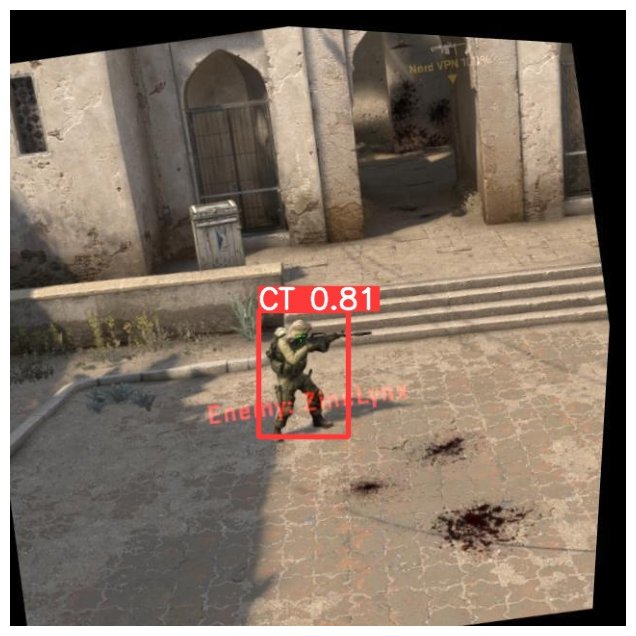

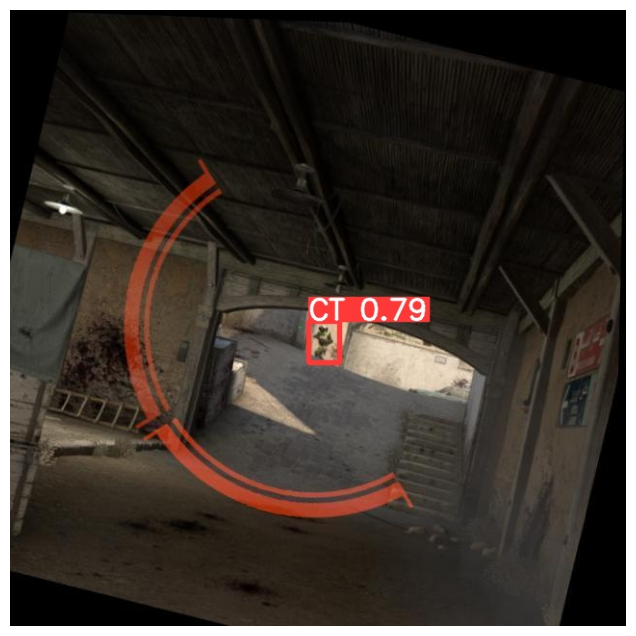

In [28]:
# Show 4 predicted examples
visualize("runs/detect/inference_results", num_images = 4)